<a href="https://colab.research.google.com/github/gggggeun/study/blob/main/tensor_and_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 데이터 다루기 연습 & data 종류와 예시

## 1. 이미지 데이터 tensor 속성, 이미지 불러오기

### Tensor의 3가지 속성 : 축의 개수, 배열의 크기, 데이터 타입

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("train data 이미지의 축의 개수 :", train_images.ndim)

train data 이미지의 축의 개수 : 3


In [5]:
print("train data 이미지 배열의 크기 : ", train_images.shape)

train data 이미지 배열의 크기 :  (60000, 28, 28)


In [6]:
print("train data 데이터 타입 : ", train_images.dtype)

train data 데이터 타입 :  uint8


MNIST 데이터의 이미지 배열은 8비트 정수형 3D 텐서이다.

정확하게 28 X 28크기의 정수 행렬 6만 개가 있는 배열임을 알 수 있다.

### MNIST 이미지 불러오기

In [14]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
train_labels[4]

9

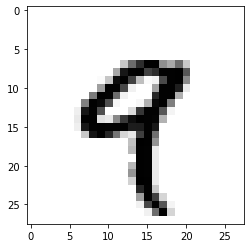

In [7]:
digit = train_images[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 2. 넘파이로 텐서 조작 - slicing

- 11번째부터 101번째까지 숫자 선택해 (90, 28, 28) 크기의 배열을 만들기

In [16]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [17]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [18]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

- 이미지 자르기 (픽셀조절)

In [19]:
# 오른쪽아래 14x14픽셀 
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

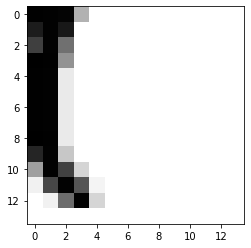

In [20]:
digit = my_slice[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [21]:
# 음수 인덱스 (현재축 : 상대적인 위치)
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

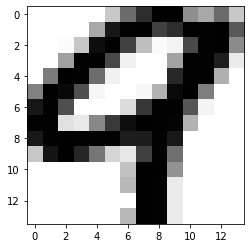

In [22]:
digit = my_slice[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [23]:
my_slice = train_images[:, :15, :15]
my_slice.shape

(60000, 15, 15)

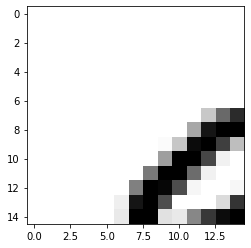

In [24]:
digit = my_slice[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [27]:
my_slice = train_images[:, :-14, :-14]
my_slice.shape

(60000, 14, 14)

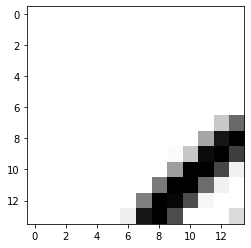

In [28]:
digit = my_slice[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 3. 배치 데이터
일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축(=0)은 샘플 축(sample axis)이다.

샘플 차원(sampe dimension)이라고도 부른다. (MNIST 예제에서는 숫자 이미지가 샘플이다.)



딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다. 그 대신 데이터를 작은 배치(batch)로 나눈다. 

구체적으로 말하면 MNIST 숫자 데이터에서 크기가 128인 배치 하나는 다음과 같다.



In [31]:
batch = train_images[:128]
batch = train_images[128:256]

n 번째 배치

In [ ]:
# n번째 batch
batch = train_images[128 * n:128 * (n + 1)]

## 4. 텐서의 예 : 데이터 종류

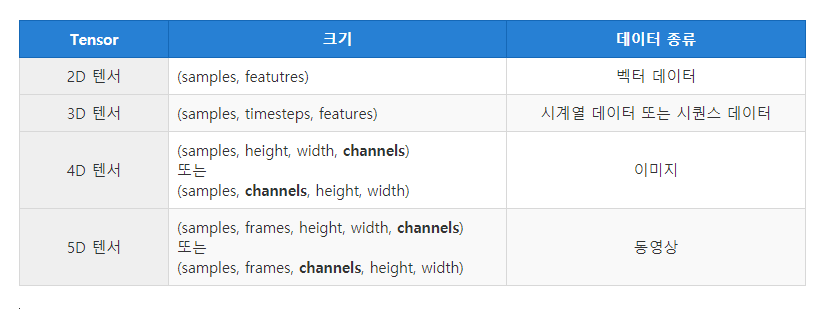

### 1) 벡터 데이터 (samples, featutres)


대부분의 경우에 해당.

이런 데이터셋에서는 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로 배치 데이터는 2D 텐서로 인코딩될 것이다.



- 첫번 째 축 : 샘플 축(sample axis)

- 두번 째 축 : 특성 축(feature axis)



예시 :

- 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터.
  - 각 사람은 3개의 값을 가진 벡터로 구성되고 10만 명이 포함된 전체 데이터셋은 (100000, 3) 크기의 텐서에 저장될 수 있다.
- (공통 단어 2만 개로 만든 사전에서) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터셋
  - 각 문서는 2만 개의 원소(사전에 있는 단어마다 하나의 원소로 대응)를 가진 벡터로 인코딩 될 수 있다.
  - 500개의 문서로 이루어진 전체 데이터셋은 (500, 20000) 크기의 텐서로 저장된다.

### 2) 시계열 데이터 또는 시퀀스 데이터 (samples, timesteps, features)


데이터에서 시간이 (또는 연속된 순서가) 중요할 때는 시간 축을 포함하여 3D 텐서로 저장된다.

각 샘플은 벡터(2D 텐서)의 시퀀스로 인코딩되므로 배치 데이터는 3D 텐서로 인코딩될 것이다.

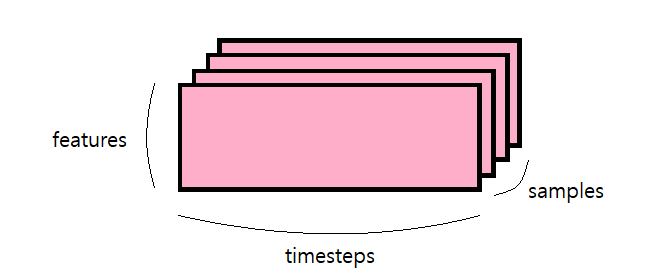

3D 시계열 & 시퀀스 데이터 텐서. 
*시간 축이 두번째 축이어서 세로에 놓여야 하지만 관례적으로 시간의 흐름을 가로 방향으로 놓기 때문에 편의상 텐서 축의 순서와 맞지 않게 그림.*

관례적으로 시간 축은 항상 두 번째 축(인덱스가 1인 축)이다.



- 첫번 째 축 : 샘플 축(sample axis)

- 두번 째 축 : 시간 축(timesteps axis)

- 세번 째 축 : 특성 축(feature axis)



예시 :

- 주식 가격 데이터셋
  - 1분마다 현재 주식 가격, 지난 1분 동안의 최고 가격과 최소 가격을 저장
  - 1분마다 데이터는 3D 벡터로 인코딩되고 하루 동안의 거래는 (390, 3) 크기의 2D 텐서로 인코딩된다.(하루 거래 시간은 390분이다. *9시반~16시, 6시간반)
  - 250일치의 데이터는 (250, 390, 3) 크기의 3D 텐서로 저장될 수 있다.(여기에서 1일치 데이터가 하나의 샘플이 된다.)
- 트윗 데이터셋
  - 각 트윗은 128개의 알파벳으로 구성된 280개의 문자 시퀀스이다.
  - 여기에서는 각 문자가 128개의 크기인 이진 벡터로 인코딩될 수 있다. (해당 문자의 인덱스만 1이고 나머지는 모두 0인 벡터)
  - 그러면 각 트윗은 (280, 128) 크기의 2D 텐서로 인코딩될 수 있다.
  - 100만 개의 트윗으로 구성된 데이터셋은 (100000, 280, 128) 크기의 텐서에 저장된다.

### 3) 이미지 데이터 (samples, height, width, channels)
또는 (samples, channels, height, width)





이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어진다.

MNIST 숫자처럼 흑백인 이미지는 하나의 컬러 채널만 가지고 있어 2D 텐서로 저장될 수 있지만 관례상 이미지 텐서는 항상 3D로 저장된다. 

흑백 이미지의 경우 컬러 채널의 차원 크기는 1이다.

256 X 256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1) 크기의 텐서에 저장될 수 있다.

컬러 이미지는 (128, 256, 256, 3) 크기의 텐서에 저장된다. (컬러 = RGB 3개)

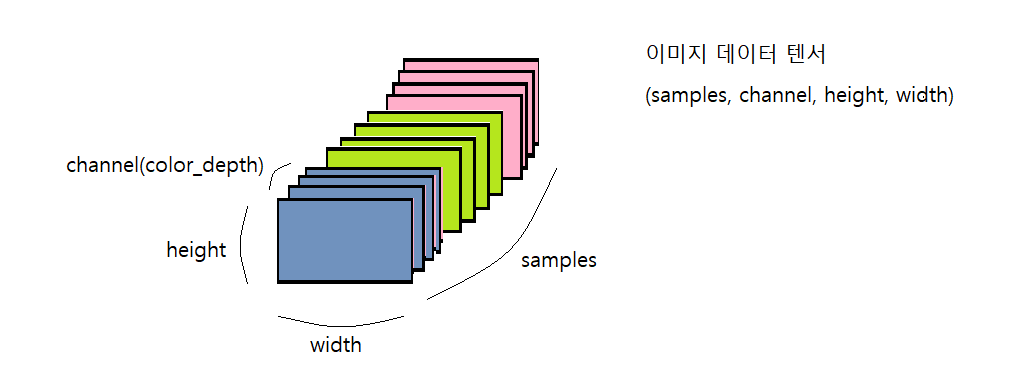


이미지 데이터 텐서 (channel 우선 표기)
이미지 텐서의 크기를 지정하는 방식은 두 가지이다.

1. (텐서플로에서 사용하는) Channel-last 방식 :  (samples, height, width, channels)
2. (씨아노에서 사용하는) Channel-first 방식 :  (samples, channels, height, width)
*일상생활에서 이미지 크기는 보통 (너비X높이)로 말하지만 행렬에서는 행이 먼저이므로 (높이 X 넓이)로 표현됨.

*케라스 설정 파일 keras.json에서 "image_data_format" 옵션을 "channels_last" 또는 "channels_first"로 지정 할 수 있음.

### 4) 비디오 데이터


비디오 데이터는 현실에서 5D 텐서가 필요한 몇 안되는 데이터 중 하나이다.

하나의 비디오는 프레임의 연속이고 각 프레임은 하나의 컬러 이미지이다.

프레임이 (height, width, channel)의 3D 텐서로 저장될 수 있기 때문에 프레임의 연속은 (frames, height, width, channel)의 4D 텐서로 저장될 수 있다.

여러 비디오의 배치는 (samples, frames, height, width, channel)의 5D 텐서로 저장될 수 있다.


예시:

- 60초짜리 144 X 256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240프레임이 된다.
- 이런 비디오 클립을 4개 가진 배치는 (4, 240, 144, 256, 3) 크기의 텐서에 저장된다.
- 만약 총 106,168,320개의 값이 float32로 저장되어 있다면?
  - 각 값이 32비트로 저장되기 때문에 텐서의 저장 크기는 405MB가 된다. (너무 크다.) 하지만 실생활에서 접하는 비디오는 float32크기로 저장되지 않기 떄문에 훨씬 용량이 적고, 일반적으로 높은 압축률로(MPEG포맷 같은 방식 사용) 압축되어 있다.